## Clean the Census data

### Problem Statement 1: (Keep the relevant data)

In [1]:
# The census 2011 file contains many fields, which we may not use. Remove some columns so
# that we are left with only relevant data.

# We may need the following columns.
# State name
# District name
# Population
# Male
# Female
# Literate
# Male_Literate
# Female_Literate
# Rural_Households
# Urban_Households
# Households
# Age_Group_0_29
# Age_Group_30_49
# Age_Group_50
# Age not stated
# Import the data to pandas and keep only the required columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '../Data/census_2011.csv'
requred_cols = [
"State name",
"District name",
"Population",
"Male",
"Female",
"Literate",
"Male_Literate",
"Female_Literate",
"Rural_Households",
"Urban_Households",
"Households",
"Age_Group_0_29",
"Age_Group_30_49",
"Age_Group_50",
"Age not stated"
]
df_census11 = pd.read_csv(path,usecols=requred_cols)
df_census11.head()

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


### Problem Statement 2: (Rename the Column names)

In [4]:
# For uniformity in the datasets and taking into consideration the census year, we need to
# rename some columns.
#  State name to State/UT
#  District name to District
#  Male_Literate to Literate_Male
#  Female_Literate to Literate_Female
#  Rural_Households to Households_Rural
#  Urban_ Households to Households_Urban
#  Age_Group_0_29 to Young_and_Adult
#  Age_Group_30_49 to Middle_Aged
#  Age_Group_50 to Senior_Citizen
#  Age not stated to Age_Not_Stated

In [5]:
cols_dict = {"State name":"State/UT",
            "District name":"District",
            "Male_Literate":"Literate_Male",
            "Female_Literate":"Literate_Female",
            "Rural_Households":"Households_Rural",
            "Urban_ Households":"Households_Urban",
            "Age_Group_0_29":"Young_and_Adult",
            "Age_Group_30_49":"Middle_Aged",
            "Age_Group_50":"Senior_Citizen",
            "Age not stated":"Age_Not_Stated"}

In [6]:
df_census11 = df_census11.rename(columns=cols_dict)
df_census11.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


### Problem Statement 3: (Rename State/UT Names)

In [7]:
 # The State/UT names are in all caps in the census data, For uniformity across datasets we use
# the names so that only the first character of each word in the name is in upper case and the
# rest are in lower case. However, if the word is “and” then it should be all lowercase.
# Examples:
#  Andaman and Nicobar Islands
#  Arunachal Pradesh
#  Bihar

In [8]:
df_census11['State/UT'] = df_census11['State/UT'].apply(lambda x: ' '.join([i.lower() if i.lower() == 'and' else i.capitalize() for i in x.split(" ")]))

In [9]:
df_census11['State/UT']

0                Jammu and Kashmir
1                Jammu and Kashmir
2                Jammu and Kashmir
3                Jammu and Kashmir
4                Jammu and Kashmir
                  ...             
635                    Pondicherry
636                    Pondicherry
637    Andaman and Nicobar Islands
638    Andaman and Nicobar Islands
639    Andaman and Nicobar Islands
Name: State/UT, Length: 640, dtype: object

### Problem Statement 4: (New State/UT formation)

In [10]:
# 
#  In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that
# were included in Telangana are stored in Data/Telangana.txt . Read the text file and
# Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.
# 
#  In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included
# the districts Leh and Kargil. Rename the State/UT From “Jammu and Kashmir” to
# “Laddakh” for the given districts.

In [12]:
with open("../Data/Telangana.txt") as file:
    ts_dists = list(file.readlines())
ts_dists = [i.replace('\n','') for i in ts_dists]
ts_dists        

['Adilabad',
 'Nizamabad',
 'Karimnagar',
 'Medak',
 'Hyderabad',
 'Rangareddy',
 'Mahbubnagar',
 'Nalgonda',
 'Warangal',
 'Khammam']

In [13]:
# df_census11[df_census11['District'].isin(ts_dists)]# = 'Telangana'
df_census11['State/UT'] = df_census11.apply(lambda x: 'Telangana' if x['District'] in ts_dists else x['State/UT'], axis=1)
df_census11['State/UT'].value_counts()

Uttar Pradesh                  71
Madhya Pradesh                 50
Bihar                          38
Maharashtra                    35
Rajasthan                      33
Tamil Nadu                     32
Karnataka                      30
Orissa                         30
Assam                          27
Gujarat                        26
Jharkhand                      24
Jammu and Kashmir              22
Haryana                        21
Punjab                         20
West Bengal                    19
Chhattisgarh                   18
Arunachal Pradesh              16
Kerala                         14
Andhra Pradesh                 13
Uttarakhand                    13
Himachal Pradesh               12
Nagaland                       11
Telangana                      10
Manipur                         9
Nct Of Delhi                    9
Mizoram                         8
Meghalaya                       7
Tripura                         4
Sikkim                          4
Pondicherry   

### Problem Statement 5: (Find and process Missing Data)

In [14]:

# Find and store the percentage of data missing for each column.
# Some data can be found and filled in by using information from other cells. Try to find the
# correct data by using information from other cells and filling it in. Find and store the
# percentage of data missing for each column.

# Hint:
# Population = Male + Female
# Literate = Literate_Male + Literate_Female
# Population = Young_and_Adult+ Middle_Aged + Senior_Citizen + Age_Not_Stated
# Households = Households_Rural + Households_Urban

# Create a visualization that compares the amount of missing data before and after the data-
# filling process was done.


In [15]:
df_census11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UT          640 non-null    object 
 1   District          640 non-null    object 
 2   Population        610 non-null    float64
 3   Male              610 non-null    float64
 4   Female            607 non-null    float64
 5   Literate          604 non-null    float64
 6   Literate_Male     609 non-null    float64
 7   Literate_Female   613 non-null    float64
 8   Households_Rural  598 non-null    float64
 9   Urban_Households  607 non-null    float64
 10  Households        608 non-null    float64
 11  Young_and_Adult   609 non-null    float64
 12  Middle_Aged       610 non-null    float64
 13  Senior_Citizen    609 non-null    float64
 14  Age_Not_Stated    605 non-null    float64
dtypes: float64(13), object(2)
memory usage: 75.1+ KB


In [16]:
total_nuls = df_census11.isnull().sum().sum()
total_nuls

421

In [17]:
na_perc_col = { df_census11.columns[i] : val*100/640 for i,val in enumerate(df_census11.isnull().sum())}
na_perc_col

{'State/UT': 0.0,
 'District': 0.0,
 'Population': 4.6875,
 'Male': 4.6875,
 'Female': 5.15625,
 'Literate': 5.625,
 'Literate_Male': 4.84375,
 'Literate_Female': 4.21875,
 'Households_Rural': 6.5625,
 'Urban_Households': 5.15625,
 'Households': 5.0,
 'Young_and_Adult': 4.84375,
 'Middle_Aged': 4.6875,
 'Senior_Citizen': 4.84375,
 'Age_Not_Stated': 5.46875}

In [18]:
# Population = Male + Female
# Literate = Literate_Male + Literate_Female
# Population = Young_and_Adult+ Middle_Aged + Senior_Citizen + Age_Not_Stated
# Households = Households_Rural + Households_Urban

In [19]:
# Population = Male + Female
tempdf = df_census11.fillna(0)
tempdf.apply(lambda x: x["Young_and_Adult"]+ x["Middle_Aged"] + x["Senior_Citizen"] + x["Age_Not_Stated"] 
                  if not x['Population']
                  else x['Population'],
                   axis = 1)

0      870354.0
1      753745.0
2      133487.0
3      140802.0
4      476835.0
         ...   
635     41816.0
636    200222.0
637     36842.0
638    105597.0
639    238142.0
Length: 640, dtype: float64

In [20]:
# Population = Young_and_Adult+ Middle_Aged + Senior_Citizen + Age_Not_Stated
tempdf = df_census11.fillna(0)
df_census11['Population'] = tempdf.apply(lambda x: x['Population']
                  if  x['Population']
                  else x["Male"]+ x["Female"] ,
                   axis = 1)

In [21]:
# Literate = Literate_Male + Literate_Female

df_census11['Literate']  = tempdf.apply(lambda x: x['Literate']
                  if  x['Literate']
                  else x["Literate_Male"]+ x["Literate_Female"] ,
                   axis = 1).isna().sum()

In [22]:
# Households = Households_Rural + Households_Urban

df_census11['Households'] = tempdf.apply(lambda x: x['Households']
                  if  x['Households']
                  else x["Households_Rural"]+ x["Urban_Households"] ,
                   axis = 1).isna().sum()

In [23]:
df_census11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UT          640 non-null    object 
 1   District          640 non-null    object 
 2   Population        640 non-null    float64
 3   Male              610 non-null    float64
 4   Female            607 non-null    float64
 5   Literate          640 non-null    int64  
 6   Literate_Male     609 non-null    float64
 7   Literate_Female   613 non-null    float64
 8   Households_Rural  598 non-null    float64
 9   Urban_Households  607 non-null    float64
 10  Households        640 non-null    int64  
 11  Young_and_Adult   609 non-null    float64
 12  Middle_Aged       610 non-null    float64
 13  Senior_Citizen    609 non-null    float64
 14  Age_Not_Stated    605 non-null    float64
dtypes: float64(11), int64(2), object(2)
memory usage: 75.1+ KB


In [24]:
nuls_aftr_fill = df_census11.isnull().sum().sum()
nuls_aftr_fill

323

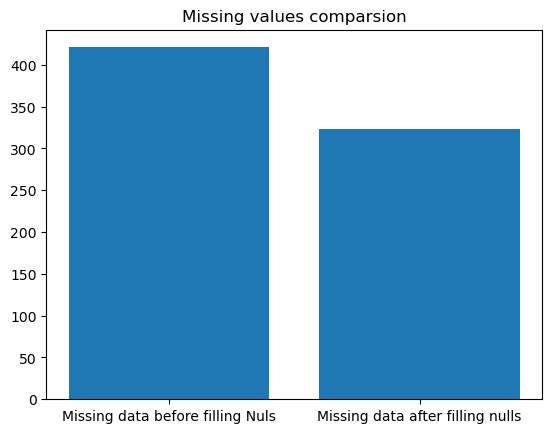

In [25]:
plt.bar(["Missing data before filling Nuls","Missing data after filling nulls"],[total_nuls,nuls_aftr_fill])
plt.title("Missing values comparsion")
plt.show()

In [28]:
new_names = {'PONDICHERRY': 'PUDUCHERRY', 'ORISSA': 'ODISHA', 'NCT OF DELHI': 'DELHI'}

In [31]:
# updating the state names in housing data

df_census11['State/UT'] = df_census11['State/UT'].apply(lambda x: new_names[x.upper()] if x.upper() in new_names.keys() else x.upper())
df_census11.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,0,282823.0,156831.0,158438.0,NaN,0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,0,207741.0,127908.0,160649.0,27190.0,0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,0,62834.0,30936.0,36920.0,17474.0,0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,0,56301.0,29935.0,40370.0,7774.0,0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,476835.0,251899.0,224936.0,0,163333.0,98391.0,132139.0,15269.0,0,304979.0,109818.0,61334.0,704.0


In [33]:
save_path = '../Clean_data/Census_cleaned.csv' 
df_census11.to_csv(save_path,index=False)